
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import sqlite3
import numpy as np
%matplotlib inline
import seaborn as sns
import sys
sys.setrecursionlimit(100000)
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:

cnt = sqlite3.connect('database.sqlite')
# match =pd.read_sql_query('select * from match', cnt)
game_query = """
SELECT cy.name, lg.name , lg.id, mt.season, mt.stage, mt.date, mt.match_api_id, mt.home_team_api_id, 
mt.away_team_api_id,mt.home_team_goal
FROM country cy
 JOIN league lg ON cy.id =lg.id
 JOIN match mt ON mt.id = lg.id """
 
team_query = """SELECT tm.team_api_id, tm.team_fifa_api_id, tm.team_long_name,
tm.team_short_name, tm_at.buildUpPlaySpeed, tm_at.buildUpPlaySpeedClass, tm_at.buildUpPlayDribbling, 
tm_at.buildUpPlayDribblingClass, tm_at.buildUpPlayPassing, tm_at.buildUpPlayPassingClass 
FROM team tm 
JOIN team_Attributes tm_at ON tm.id = tm_at.id"""

player_query = """
SELECT py.player_api_id, py.height, py.weight,  py_at.overall_rating,py_at.potential, py_at.crossing, py_at.finishing, 
py_at.heading_accuracy, py_at.short_passing, py_at.volleys,
py_at.dribbling, py_at.curve ,py_at.free_kick_accuracy, py_at.long_passing, py_at.ball_control, py_at.acceleration, 
py_at.sprint_speed, py_at.agility,py_at.reactions, py_at.balance, py_at.shot_power, py_at.jumping, py_at.stamina, 
py_at.strength, py_at.long_shots, py_at.aggression, py_at.interceptions, py_at.positioning, py_at.vision, py_at.penalties,
py_at.marking, py_at.standing_tackle, py_at.sliding_tackle
FROM player py
JOIN player_Attributes py_at ON py.id = py_at.id
"""
game = pd.read_sql_query(game_query, cnt)
team =pd.read_sql_query(team_query, cnt)
play =pd.read_sql_query(player_query, cnt)


### Data Cleaning (Exploring the data and replacing missing values )

>exploring the game dataset which contains the country, league and match tables

In [4]:
game.shape

(11, 10)

In [5]:
game.head(5)

,name,name,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal
0,Belgium,Belgium Jupiler League,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1
1,England,England Premier League,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1
2,France,France Ligue 1,4769,2008/2009,1,2008-08-09 00:00:00,483129,8583,9830,2
3,Germany,Germany 1. Bundesliga,7809,2008/2009,1,2008-08-15 00:00:00,499317,9823,9790,2
4,Italy,Italy Serie A,10257,2008/2009,1,2008-08-31 00:00:00,537632,8524,8551,1


In [6]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              11 non-null     object
 1   name              11 non-null     object
 2   id                11 non-null     int64 
 3   season            11 non-null     object
 4   stage             11 non-null     int64 
 5   date              11 non-null     object
 6   match_api_id      11 non-null     int64 
 7   home_team_api_id  11 non-null     int64 
 8   away_team_api_id  11 non-null     int64 
 9   home_team_goal    11 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1008.0+ bytes


>exploring team data which contains team and team attributes

In [7]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team_api_id                21 non-null     int64  
 1   team_fifa_api_id           19 non-null     float64
 2   team_long_name             21 non-null     object 
 3   team_short_name            21 non-null     object 
 4   buildUpPlaySpeed           21 non-null     int64  
 5   buildUpPlaySpeedClass      21 non-null     object 
 6   buildUpPlayDribbling       7 non-null      float64
 7   buildUpPlayDribblingClass  21 non-null     object 
 8   buildUpPlayPassing         21 non-null     int64  
 9   buildUpPlayPassingClass    21 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.8+ KB


In [10]:
team.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass
0,9987,673.0,KRC Genk,GEN,60,Balanced,52.428571,Little,50,Mixed
1,9993,675.0,Beerschot AC,BAC,52,Balanced,48.000000,Normal,56,Mixed
2,10000,15005.0,SV Zulte-Waregem,ZUL,47,Balanced,41.000000,Normal,54,Mixed
3,9994,2007.0,Sporting Lokeren,LOK,70,Fast,52.428571,Little,70,Long
4,9984,1750.0,KSV Cercle Brugge,CEB,47,Balanced,52.428571,Little,52,Mixed


>exploring player data which contains player and player attributes tables

In [11]:
play.shape

(11060, 33)

In [13]:
play.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   height              11060 non-null  float64
 2   weight              11060 non-null  int64  
 3   overall_rating      11021 non-null  float64
 4   potential           11021 non-null  float64
 5   crossing            11021 non-null  float64
 6   finishing           11021 non-null  float64
 7   heading_accuracy    11021 non-null  float64
 8   short_passing       11021 non-null  float64
 9   volleys             10935 non-null  float64
 10  dribbling           11021 non-null  float64
 11  curve               10935 non-null  float64
 12  free_kick_accuracy  11021 non-null  float64
 13  long_passing        11021 non-null  float64
 14  ball_control        11021 non-null  float64
 15  acceleration        11021 non-null  float64
 16  spri

In [15]:
play.describe()


,player_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11021.000000,11021.00000,11021.000000,11021.000000,10935.000000,...,11021.000000,11021.000000,11021.000000,11021.000000,11021.000000,10935.000000,11021.000000,11021.000000,11021.000000,10935.000000
mean,156582.427215,181.867445,168.380289,68.546956,73.888758,55.313129,51.11224,56.624989,62.900372,50.371376,...,66.514563,54.635151,60.514835,51.050177,57.153071,58.586923,55.227656,45.702386,49.648852,47.100229
std,160713.700624,6.369201,14.990217,7.079292,6.515596,16.763305,18.60130,15.810921,14.083999,17.717399,...,12.649164,17.925162,15.893797,19.425980,17.833208,14.840507,14.981513,21.045728,21.281735,21.379625
min,2625.000000,157.480000,117.000000,40.000000,51.000000,6.000000,2.00000,3.000000,3.000000,2.000000,...,20.000000,3.000000,10.000000,7.000000,3.000000,2.000000,6.000000,1.000000,2.000000,2.000000
25%,35555.500000,177.800000,159.000000,64.000000,69.000000,45.000000,36.00000,48.000000,58.000000,37.000000,...,59.000000,43.000000,50.000000,33.000000,48.000000,50.000000,46.000000,25.000000,28.000000,25.000000
50%,96619.500000,182.880000,168.000000,69.000000,74.000000,59.000000,55.00000,59.000000,66.000000,53.000000,...,68.000000,59.000000,63.000000,54.000000,61.000000,61.000000,57.000000,47.000000,54.000000,49.000000
75%,212470.500000,185.420000,179.000000,74.000000,78.000000,68.000000,66.00000,67.000000,73.000000,64.000000,...,75.000000,68.000000,73.000000,68.000000,70.000000,70.000000,66.000000,65.000000,68.000000,66.000000
max,750584.000000,208.280000,243.000000,91.000000,93.000000,92.000000,93.00000,93.000000,92.000000,87.000000,...,95.000000,93.000000,94.000000,93.000000,95.000000,90.000000,94.000000,94.000000,95.000000,90.000000


In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second


In [19]:
replace = play.columns
for item in replace:
    mean_fn = play[item].mean()
    play[item].fillna(mean_fn, inplace = True)
        

In [ ]:
mean = team['buildUpPlayDribbling'].mean()
team['buildUpPlayDribbling'].fillna(mean, inplace = True)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (The relationship between physical attributes and player perfomance)

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   height              11060 non-null  float64
 2   weight              11060 non-null  int64  
 3   overall_rating      11060 non-null  float64
 4   potential           11060 non-null  float64
 5   crossing            11060 non-null  float64
 6   finishing           11060 non-null  float64
 7   heading_accuracy    11060 non-null  float64
 8   short_passing       11060 non-null  float64
 9   volleys             11060 non-null  float64
 10  dribbling           11060 non-null  float64
 11  curve               11060 non-null  float64
 12  free_kick_accuracy  11060 non-null  float64
 13  long_passing        11060 non-null  float64
 14  ball_control        11060 non-null  float64
 15  acceleration        11060 non-null  float64
 16  spri

In [21]:
#play['birthday'].value_counts().plot(kind ='bar', figsize=(10,7))

<AxesSubplot:>

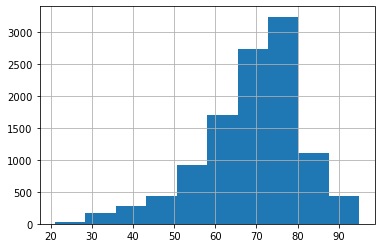

In [22]:
play['sprint_speed'].hist()

<AxesSubplot:>

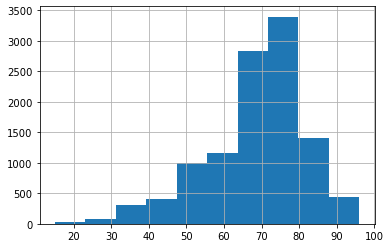

In [23]:
play['acceleration'].hist()

<AxesSubplot:xlabel='sprint_speed', ylabel='acceleration'>

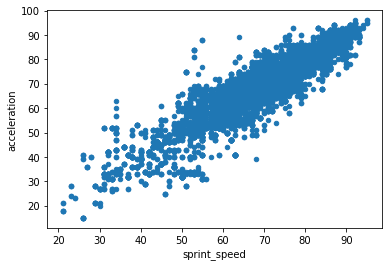

In [24]:
play.plot(x ='sprint_speed', y ='acceleration', kind ='scatter')

<AxesSubplot:xlabel='height', ylabel='acceleration'>

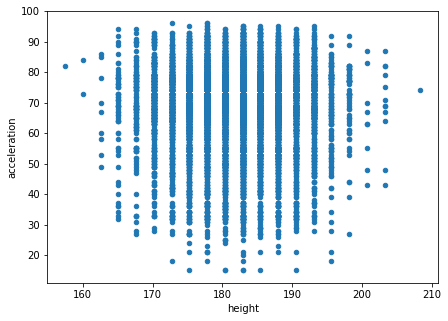

In [30]:
play.plot(x='height', y= 'acceleration', kind = 'scatter', figsize= (7,5))

### Research Question 2 Eploring multivariate data 

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!